In [596]:
from qiskit import QuantumCircuit, Aer, execute, transpile, execute, IBMQ
from qiskit_aer import AerSimulator

from qiskit.tools.monitor import job_monitor
from qiskit.circuit.library import RGQFTMultiplier

from qiskit.circuit import Instruction, CircuitInstruction, Qubit, QuantumRegister, Clbit, ClassicalRegister
from qiskit.circuit.library.standard_gates import IGate, XGate, CXGate, CCXGate, C3XGate, C4XGate, MCXGate
from qiskit.exceptions import QiskitError

import matplotlib.pyplot as plt
%matplotlib inline
from qiskit.visualization import plot_histogram

import os
import sys
import math as m
import numpy as np
import pandas as pd
import sympy

from _functools import *
from traceback import format_exc

In [597]:
backend = AerSimulator(method='matrix_product_state')

In [598]:
inputDigits = 3

In [599]:
nInputs = inputDigits + inputDigits
nOutput = 2*inputDigits

nQubits = nInputs+nOutput

q = QuantumRegister(nQubits, 'q')
c = ClassicalRegister(nOutput*2, 'c')

mCirc = QuantumCircuit(q, c)

In [600]:
operation = 1

mCirc.data = [CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]),
                                 qubits=(Qubit(q, inputIndex),),
                                 clbits=()) for inputIndex in range(nInputs)]

In [601]:
list(mCirc.data)

[CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 0),), clbits=()),
 CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 1),), clbits=()),
 CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 2),), clbits=()),
 CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 3),), clbits=()),
 CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 4),), clbits=()),
 CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 5),), clbits=())]

In [602]:
A, B = 7, 6

ABin, BBin = bin(A)[2:], bin(B)[2:]

# Operand A
for ADigit, AIndex in zip(ABin, range(len(ABin))[::-1]):
    ABinInput = int(ADigit)
    gateName = ['id', 'x'][ABinInput]
    
    mCirc.data[AIndex + nInputs*(operation-1)].operation.name = gateName
    
    print(AIndex, ADigit, gateName)

# Operand B
for BDigit, BIndex in zip(BBin, range(len(BBin))[::-1]):
    BBinInput = int(BDigit)
    gateName = ['id', 'x'][BBinInput]
    
    mCirc.data[BIndex+inputDigits + nInputs*(operation-1)].operation.name = gateName
    
    print(BIndex+inputDigits, BDigit, gateName)

2 1 x
1 1 x
0 1 x
5 1 x
4 1 x
3 0 id


In [603]:
mCirc1 = RGQFTMultiplier(num_state_qubits=inputDigits,
                         num_result_qubits=inputDigits*2)

mCirc = mCirc.compose(mCirc1)

In [604]:
operation = 2

mCirc.data += [CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]),
                                 qubits=(Qubit(q, inputIndex),),
                                 clbits=()) for inputIndex in range(nInputs)]

# Operand A => C
for ADigit, AIndex in zip(ABin, range(len(ABin))[::-1]):
    ABinInput = int(ADigit)
    gateName = ['x', 'id'][ABinInput]
    
    mCirc.data[AIndex+1 + nInputs*(operation-1)].operation.name = gateName
    
    print(AIndex+1, ADigit, gateName)

# Operand B => D
for BDigit, BIndex in zip(BBin, range(len(BBin))[::-1]):
    BBinInput = int(BDigit)
    gateName = ['x', 'id'][BBinInput]
    
    mCirc.data[BIndex+1+inputDigits + nInputs*(operation-1)].operation.name = gateName
    
    print(BIndex+1+inputDigits, BDigit, gateName)

3 1 id
2 1 id
1 1 id
6 1 id
5 1 id
4 0 x


In [605]:
operation = 3

mCirc.data += [CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]),
                                 qubits=(Qubit(q, inputIndex),),
                                 clbits=()) for inputIndex in range(nInputs)]

In [606]:
list(mCirc.data)

[CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 0),), clbits=()),
 CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 1),), clbits=()),
 CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 2),), clbits=()),
 CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 3),), clbits=()),
 CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 4),), clbits=()),
 CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 5),), clbits=()),
 CircuitInstruction(operation=Instruction(name='RGQFTMultiplier', num_qubits=12, num_clbits=0, para

In [607]:
rangeLimit = 2**inputDigits

# Qubit Range
QRange = range(nInputs, nQubits)

# Classical Bit Range
CRange = range(0, nOutput)

mCirc.data += [CircuitInstruction(operation=Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 6),), clbits=(Clbit(ClassicalRegister(12, 'c'), 0),)),
 CircuitInstruction(operation=Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 7),), clbits=(Clbit(ClassicalRegister(12, 'c'), 1),)),
 CircuitInstruction(operation=Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 8),), clbits=(Clbit(ClassicalRegister(12, 'c'), 2),)),
 CircuitInstruction(operation=Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 9),), clbits=(Clbit(ClassicalRegister(12, 'c'), 3),)),
 CircuitInstruction(operation=Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 10),), clbits=(Clbit(ClassicalRegister(12, 'c'), 4),)),
 CircuitInstruction(operation=Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 11),), clbits=(Clbit(ClassicalRegister(12, 'c'), 5),))]

#mCirc.measure(QRange, CRange)

In [608]:
C, D = 4, 5

CDin, DDin = bin(C)[2:], bin(D)[2:]

# Operand C
for CDigit, CIndex in zip(CDin, range(len(CDin))[::-1]):
    CDinInput = int(CDigit)
    gateName = ['id', 'x'][CDinInput]
    
    mCirc.data[CIndex+1 + nInputs*(operation-1)].operation.name = gateName
    
    print(CIndex+1 + nInputs*(operation-1), CDigit, gateName)

# Operand D
for DDigit, DIndex in zip(DDin, range(len(DDin))[::-1]):
    BBinInput = int(BDigit)
    gateName = ['id', 'x'][DDinInput]
    
    mCirc.data[DIndex+1+inputDigits + nInputs*(operation-1)].operation.name = gateName
    
    print(DIndex+1+inputDigits + nInputs*(operation-1), DDigit, gateName)

15 1 x
14 0 id
13 0 id
18 1 x
17 0 x
16 1 x


In [609]:
list(mCirc.data)

[CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 0),), clbits=()),
 CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 1),), clbits=()),
 CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 2),), clbits=()),
 CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 3),), clbits=()),
 CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 4),), clbits=()),
 CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 5),), clbits=()),
 CircuitInstruction(operation=Instruction(name='RGQFTMultiplier', num_qubits=12, num_clbits=0, para

In [610]:
mCirc2 = RGQFTMultiplier(num_state_qubits=inputDigits,
                         num_result_qubits=inputDigits*2)

mCirc = mCirc.compose(mCirc2)

In [611]:
rangeLimit = 2**inputDigits

# Qubit Range
QRange = range(nInputs, nQubits)

# Classical Bit Range
CRange = range(0, nOutput)

mCirc.measure(QRange, CRange)

In [612]:
job = execute(mCirc, backend, shots=2000)
result = job.result()
counts = result.get_counts()
print(f'{A}*{B}')
print('---')
print(counts)
print(int(list(counts)[0], 2))

7*6
---
{'000000101010': 2000}
42


In [613]:
list(mCirc.data)

[CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 0),), clbits=()),
 CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 1),), clbits=()),
 CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 2),), clbits=()),
 CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 3),), clbits=()),
 CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 4),), clbits=()),
 CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(12, 'q'), 5),), clbits=()),
 CircuitInstruction(operation=Instruction(name='RGQFTMultiplier', num_qubits=12, num_clbits=0, para

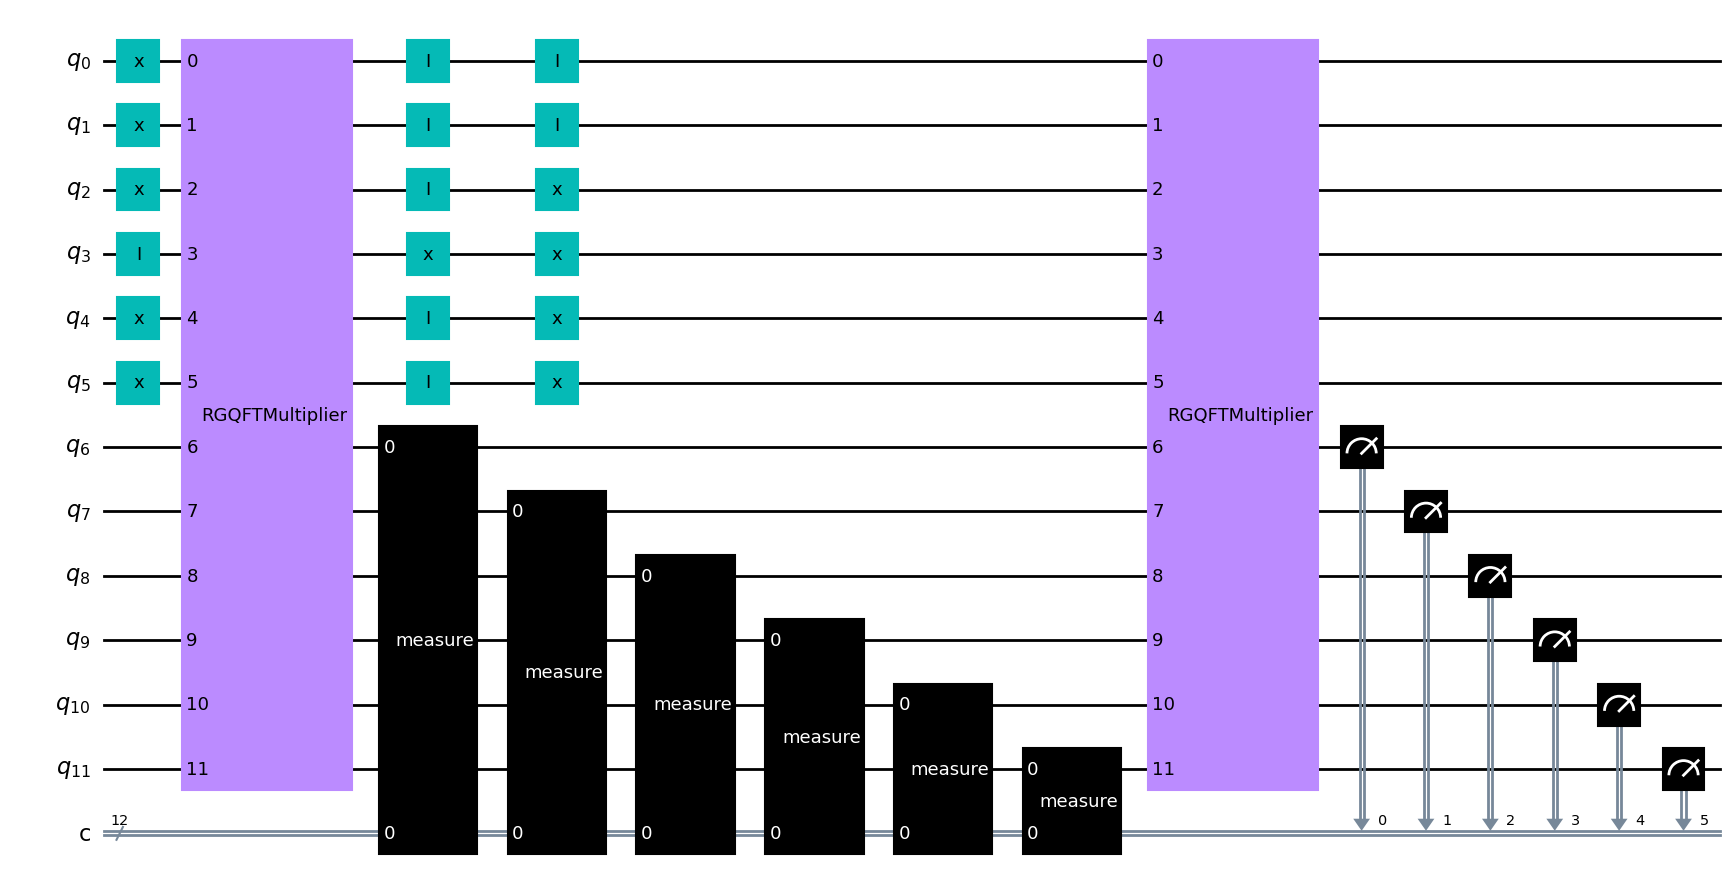

In [614]:
mCirc.draw(output='mpl')